In [1]:
import pandas as pd

In [2]:
# Load the uploaded data
df = pd.read_csv("Recruitment_Data_updated.csv")

In [3]:
df.head()

,attrition,performance_rating,sales_quota_pct,recruiting_source
0,0.000707,2.976686,0.604739,Applied Online
1,-0.019452,2.989157,0.396567,NaN
2,-0.009998,2.993355,0.206242,Applied Online
3,-0.003004,1.989966,-0.475037,NaN
4,-0.025405,3.016559,0.345470,Campus


In [4]:
df.columns

Index(['attrition', 'performance_rating', 'sales_quota_pct',
       'recruiting_source'],
      dtype='object')

In [5]:
avg_sales_by_source = df.groupby('recruiting_source')['sales_quota_pct'].mean()
avg_attrition_by_source = df.groupby('recruiting_source')['attrition'].mean()

In [6]:
avg_sales_by_source, avg_attrition_by_source

(recruiting_source
 Applied Online    1.080959
 Campus            1.076408
 Referral          1.075538
 Search Firm       1.103426
 Name: sales_quota_pct, dtype: float64,
 recruiting_source
 Applied Online    0.213370
 Campus            0.215109
 Referral          0.214920
 Search Firm       0.208177
 Name: attrition, dtype: float64)

In [7]:
print (avg_sales_by_source, avg_attrition_by_source)

recruiting_source
Applied Online    1.080959
Campus            1.076408
Referral          1.075538
Search Firm       1.103426
Name: sales_quota_pct, dtype: float64 recruiting_source
Applied Online    0.213370
Campus            0.215109
Referral          0.214920
Search Firm       0.208177
Name: attrition, dtype: float64


In [8]:
# Group data by 'recruiting_source' to get the average 'sales_quota_pct' and 'attrition' for each source
grouped_data = df.groupby('recruiting_source').agg(
    avg_sales_quota_pct=('sales_quota_pct', 'mean'),
    avg_attrition=('attrition', 'mean'),
    count=('recruiting_source', 'size')  # Count of records for each source
).reset_index()

# Display the grouped data for insights
grouped_data.sort_values(by=['avg_sales_quota_pct', 'avg_attrition'], ascending=[False, True])


,recruiting_source,avg_sales_quota_pct,avg_attrition,count
3,Search Firm,1.103426,0.208177,2408
0,Applied Online,1.080959,0.213370,30966
1,Campus,1.076408,0.215109,13453
2,Referral,1.075538,0.214920,10926


In [9]:
pip install plotnine

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


C:\Users\HP\AppData\Local\Temp\ipykernel_11444\3211609679.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recruitment_data_cleaned['attrition_flag'] = recruitment_data_cleaned['attrition'] > 0


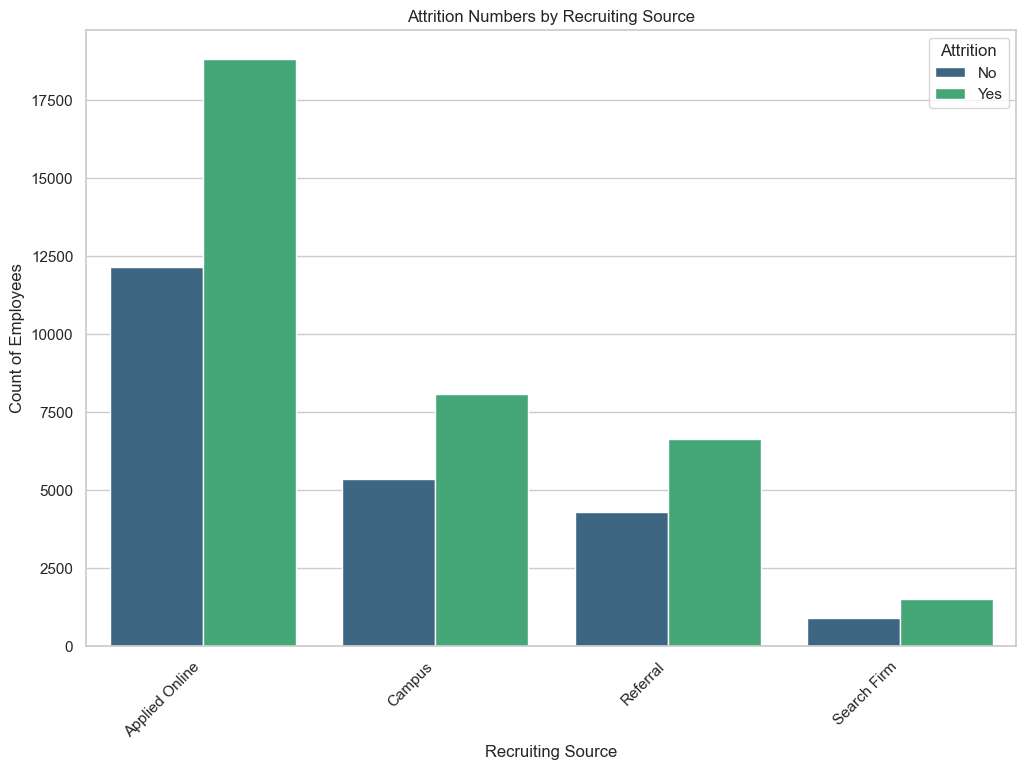

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Clean the data by dropping rows with missing recruiting sources
recruitment_data_cleaned = df.dropna(subset=['recruiting_source'])

# Flag attrition values greater than 0 as "Yes"
recruitment_data_cleaned['attrition_flag'] = recruitment_data_cleaned['attrition'] > 0

# Set up the plot
plt.figure(figsize=(12, 8))
sns.set_theme(style="whitegrid")
sns.countplot(data=recruitment_data_cleaned, x='recruiting_source', hue='attrition_flag', palette="viridis")

# Customize labels and title
plt.title('Attrition Numbers by Recruiting Source')
plt.xlabel('Recruiting Source')
plt.ylabel('Count of Employees')
plt.xticks(rotation=45, ha="right")
plt.legend(title="Attrition", labels=["No", "Yes"])

# Show plot
plt.show()


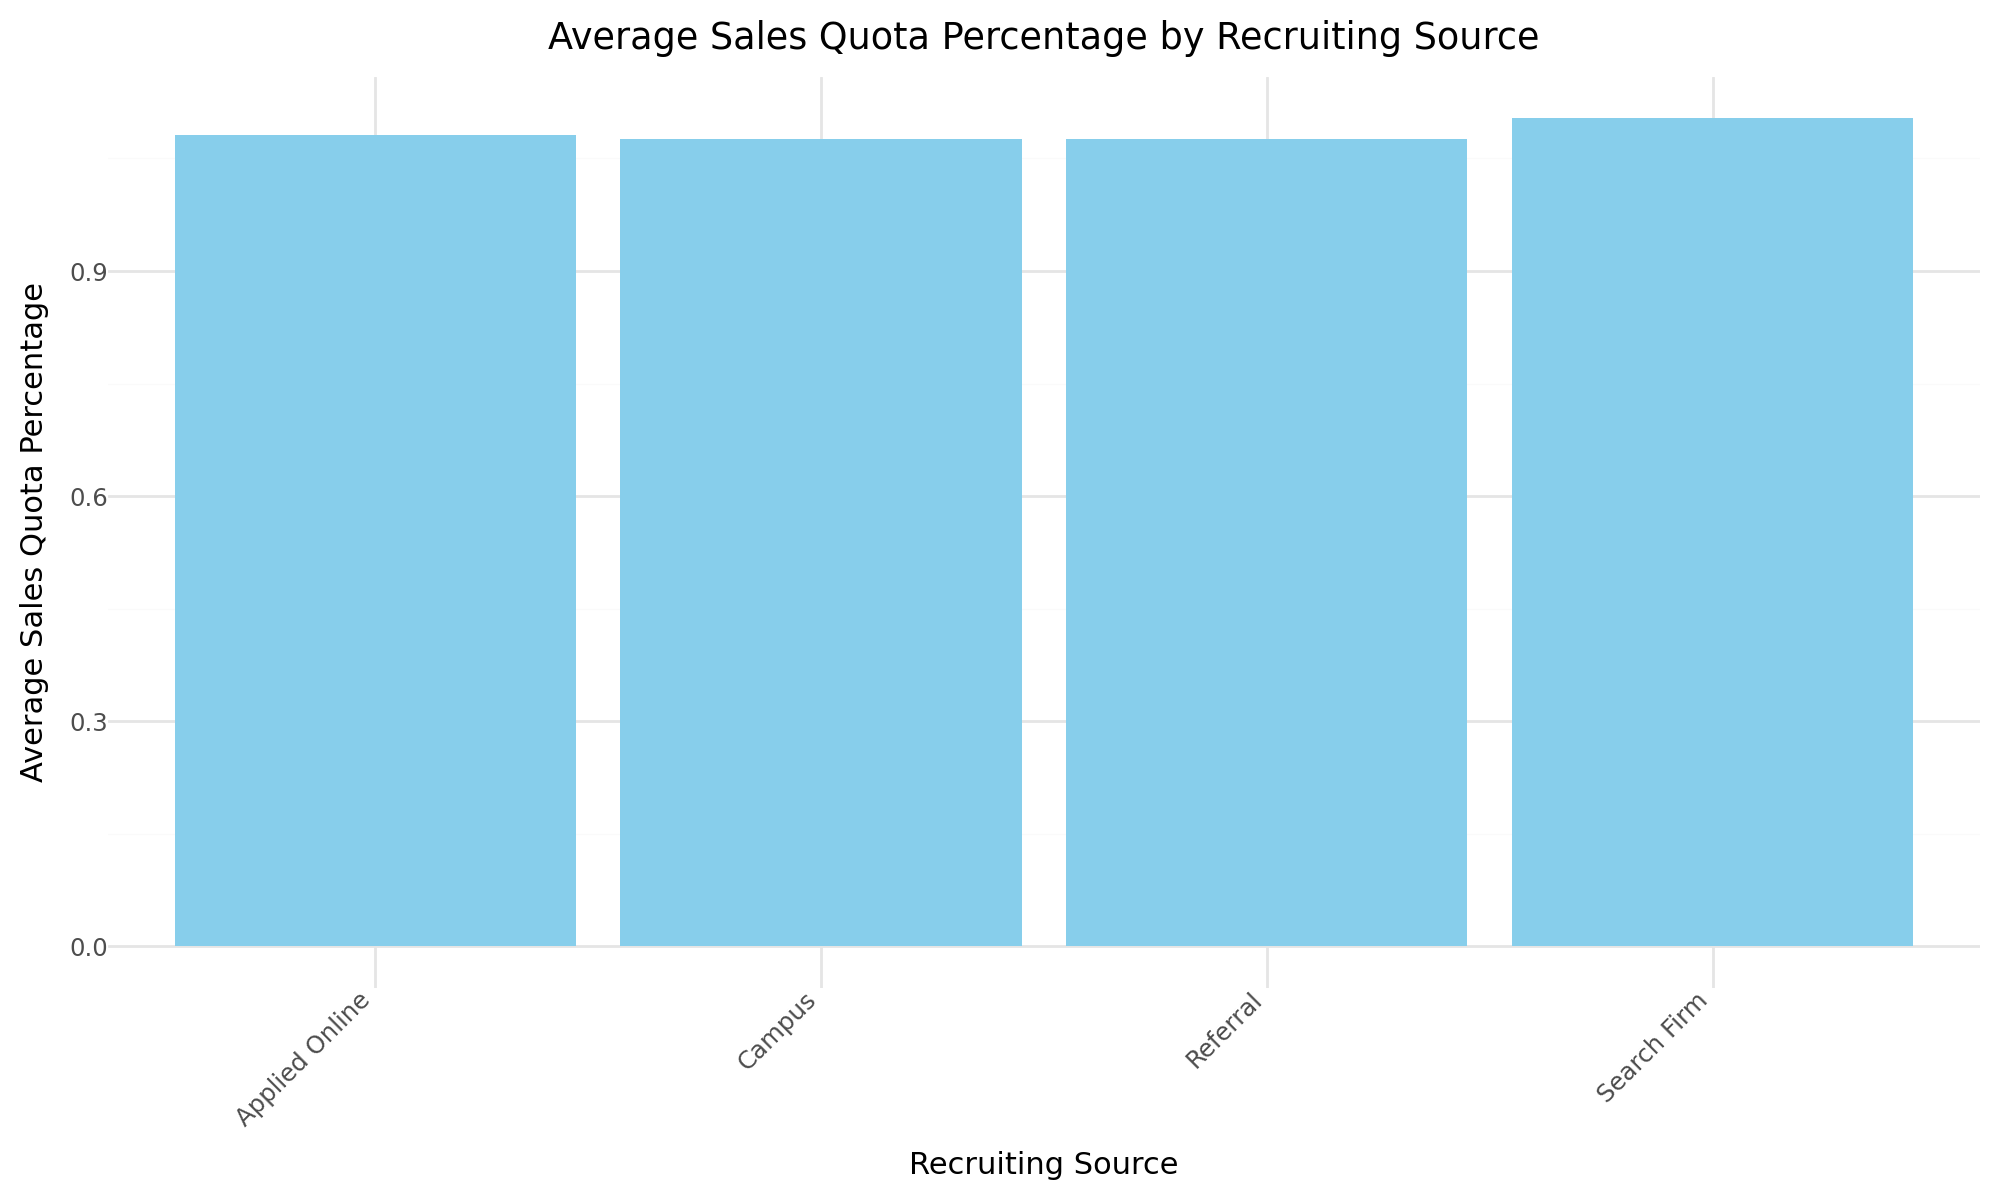

In [12]:
import pandas as pd
from plotnine import ggplot, aes, geom_bar, labs, theme_minimal, theme, element_text


# Drop missing recruiting sources
recruitment_data_cleaned = df.dropna(subset=['recruiting_source'])

# Calculate the average sales_quota_pct by recruiting source
recruitment_data_sales = recruitment_data_cleaned.groupby('recruiting_source', as_index=False)['sales_quota_pct'].mean()

# Plot using plotnine (ggplot in Python)
plot = (ggplot(recruitment_data_sales, aes(x='recruiting_source', y='sales_quota_pct')) +
        geom_bar(stat="identity", fill="skyblue") +
        labs(title='Average Sales Quota Percentage by Recruiting Source',
             x='Recruiting Source',
             y='Average Sales Quota Percentage') +
        theme_minimal() +
        theme(figure_size=(10, 6), axis_text_x=element_text(rotation=45, hjust=1)))

# Display plot
plot
